<a href="https://colab.research.google.com/github/federicapennino/Data_analysis/blob/LABS/Analyzing_Democracy_and_Female_Unemployment_Through_Data_Categorization_and_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Democracy and Female Unemployment Through Data Categorization and Correlation

This analysis explores the relationship between democracy status, female unemployment, and civil rights across countries. The study includes:

Recoding variables into categories for better interpretation.
Cross-tabulation to explore relationships between recoded variables.
Correlation analysis to assess the strength and direction of relationships.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#import data
url = 'https://www.qogdata.pol.gu.se/data/qog_bas_cs_jan24.xlsx'
df = pd.read_excel(url)
df.head()

,ccode,cname,ccode_qog,cname_qog,ccodealp,ccodecow,version,ajr_settmort,atop_ally,atop_number,...,wvs_imprel,wvs_pmi12,wvs_psarmy,wvs_psdem,wvs_psexp,wvs_pssl,wvs_relacc,wvs_satfin,wvs_subh,wvs_trust
0,4,Afghanistan,4,Afghanistan,AFG,700.0,QoGBasCSjan24,4.540098,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,8,Albania,ALB,339.0,QoGBasCSjan24,NaN,1.0,8.0,...,2.869328,NaN,1.596485,3.849031,3.475513,1.744196,NaN,NaN,3.488758,0.027857
2,12,Algeria,12,Algeria,DZA,615.0,QoGBasCSjan24,4.359270,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,Andorra,20,Andorra,AND,232.0,QoGBasCSjan24,NaN,1.0,2.0,...,2.034930,2.710393,1.336049,3.681363,2.635721,1.830491,1.751004,6.561316,4.089642,0.255744
4,24,Angola,24,Angola,AGO,540.0,QoGBasCSjan24,5.634789,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Recoding Variables**

**Democracy Status (bti_ds) **
The democracy status variable measures democratic quality based on five criteria: stateness, political participation, rule of law, institutional stability, and social integration. The variable is recoded into five categories for clarity:

Very poor status: Democracy scores ≤2.
Poor status: Scores between 2 and 4.
Fair status: Scores between 4 and 6.
Good status: Scores between 6 and 8.
Very good status: Scores >8.

**Female Unemployment (wdi_unempHlo)**
Female unemployment, measured as the percentage of unemployed women in the labor force, is recoded into five levels:

Very low unemployment: ≤2%.
Low unemployment: >2% and ≤9%.
Average unemployment: >9% and ≤16%.
High unemployment: >16% and ≤24%.
Very high unemployment: >24%.

In [ ]:
conditions = [
    (df['bti_ds'] <= 2) ,
    (df['bti_ds'] >2 ) & (df['bti_ds'] <=4),
    (df['bti_ds'] >4 ) & (df['bti_ds'] <=6),
    (df['bti_ds'] >6 ) & (df['bti_ds'] <=8),
    (df['bti_ds'] > 8)]
choices = ["Very poor status", "Poor status", "Fair status", "Good status", "Very good status"]
df['democracy_status'] = np.select(conditions, choices, default=np.nan)

In [ ]:
df['democracy_status'] = df['democracy_status'].replace('nan', np.nan)

In [ ]:
df_cleaned = df.dropna(subset=['democracy_status'])

In [ ]:
# NUmber of countries in each section
df.democracy_status.value_counts(dropna=False)

,count
democracy_status,
NaN,58
Poor status,41
Good status,38
Fair status,38
Very good status,16
Very poor status,3


From the table above, it is possible to observe that "poor status" is the most frequent category, followed by "good" and "fair" statuses. In the table below, where the data are displayed as percentages of the total, we can see that 30% of the countries fall within the "poor status" category, while very few countries, only 2%, are in the "very poor status" category. Additionally, it is important to note that there are 58 countries for which data are missing, which could ultimately bias the results of the analysis. Overall, the majority of the data fall within the "fair," "good," and "poor" status categories, whereas the two extreme categories contain significantly fewer data points.

In [ ]:
df.democracy_status.value_counts(normalize=True).sort_index()*100

,proportion
democracy_status,
Fair status,27.941176
Good status,27.941176
Poor status,30.147059
Very good status,11.764706
Very poor status,2.205882


In [ ]:
# Checking how the original variable has been recorded
pd.crosstab(df['bti_ds'], df['democracy_status'])

democracy_status,Fair status,Good status,Poor status,Very good status,Very poor status
bti_ds,,,,,
1.500000,0,0,0,0,1
1.650000,0,0,0,0,1
1.800000,0,0,0,0,1
2.116667,0,0,1,0,0
2.400000,0,0,1,0,0
...,...,...,...,...,...
9.300000,0,0,0,1,0
9.500000,0,0,0,1,0
9.600000,0,0,0,1,0


**Visualization**

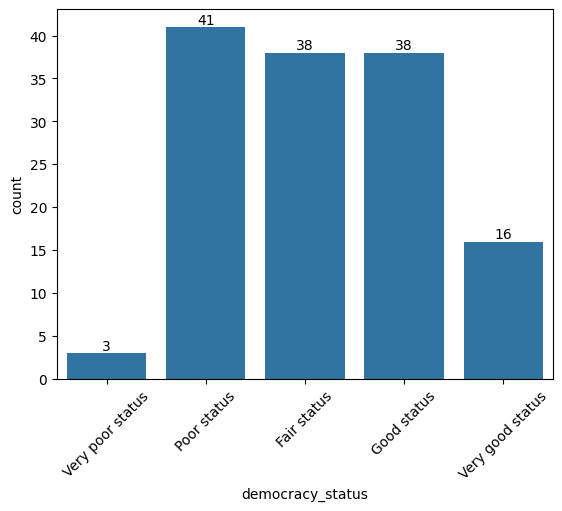

In [ ]:
# Creation of an histogram to visualize how many entries are in each category
sns.countplot(x='democracy_status', data=df, order=["Very poor status", "Poor status", "Fair status", "Good status", "Very good status"])
# Adding count label on bars
ax = plt.gca()
ax.bar_label(ax.containers[0])
# Changing the slope of the x-ax label to visualize better each label
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Distribution of the variable
df[['bti_ds']].describe()

,bti_ds
count,136.000000
mean,5.375368
std,2.033267
min,1.500000
25%,3.666667
50%,4.891667
75%,6.862500
max,9.950000


From the histogram, we can reach the same conclusion as above: "very poor status" is the least common, with only 3 countries falling into this category. Overall, from the distribution table, we can assess that 75% of the countries have a democracy status score of 6.9 or below.

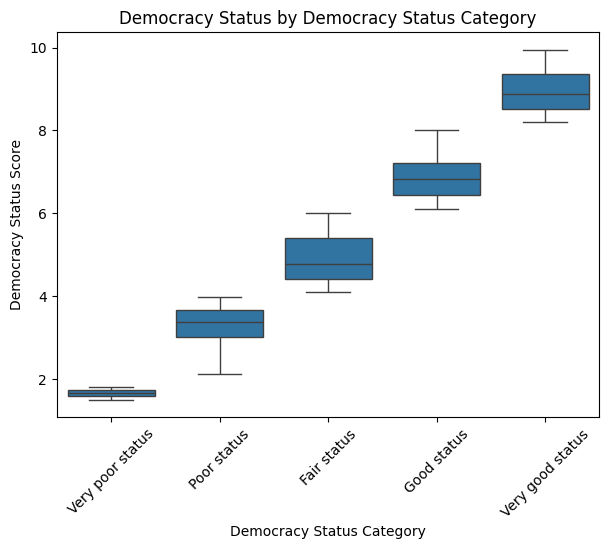

In [ ]:
# Visualizing the data with a boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='democracy_status', y='bti_ds', data=df, order=["Very poor status", "Poor status", "Fair status", "Good status", "Very good status"])
plt.title('Democracy Status by Democracy Status Category')
plt.xlabel('Democracy Status Category')
plt.ylabel('Democracy Status Score')
# Change the slope of the x-ax label
plt.xticks(rotation=45)
plt.show()

Taking into account the box plot and the table below, we can observe that countries in the "very poor status" category show the lowest variation, with a standard deviation of 0.15. In contrast, the category with the highest degree of variability among countries is "fair status," with a standard deviation of 0.62. This likely indicates that countries in the "fair status" category are more diverse in terms of their democratic processes, institutions, and social and political integration.

In [ ]:
print(df.groupby('democracy_status')['bti_ds'].describe())

                  count      mean       std       min       25%       50%  \
democracy_status                                                            
Fair status        38.0  4.898684  0.620863  4.100000  4.404167  4.775000   
Good status        38.0  6.894737  0.539994  6.100000  6.450000  6.825000   
Poor status        41.0  3.290244  0.469160  2.116667  3.000000  3.366667   
Very good status   16.0  8.940625  0.552937  8.200000  8.512500  8.875000   
Very poor status    3.0  1.650000  0.150000  1.500000  1.575000  1.650000   
nan                 0.0       NaN       NaN       NaN       NaN       NaN   

                       75%       max  
democracy_status                      
Fair status       5.412500  6.000000  
Good status       7.212500  8.000000  
Poor status       3.666667  3.966667  
Very good status  9.350000  9.950000  
Very poor status  1.725000  1.800000  
nan                    NaN       NaN  


The Second Variable I chose was **Unemployment, female (as a % of female labor force, wdi_unempfilo)**. I decided to break it in the following levels:
Very low unemployment: <=2%
Low unemployment: >2% and <=9%;
Average unemployment: >9% and <=16%;
High unemployment: >16% and <=24%;
Very high unemployment: >24%;
The data for the range were chosen considering the data in the table below.
For "very low unemployment" I chose to use 2% as it makes sense from an economic point of view. The reason is that the NAIRU, natural rate of unemployment which takes into consideration frictional unemployment, is usually somewhere around 2-5%.
With the following lines of code I am going to recode the variable according to the scale that I have just outlited above.

In [ ]:
df['female_unemployment'] = pd.cut(df['wdi_unempfilo'],
                   bins=[0, 2, 9, 16, 24, float('inf')],
                   right=True,
                  labels=["Very low unemployment", "Low unemployment", "Average unemployment", "High unemployment", "Very high unemployment"], ordered=True)

In [ ]:
df['female_unemployment'] = df['female_unemployment'].replace('nan', np.nan)

In [ ]:
df_cleaned = df.dropna(subset=['female_unemployment'])

In [ ]:
# Displaying how many countries fall in each of the categories outlined above
df.female_unemployment.value_counts(sort=False, dropna=False)

,count
female_unemployment,
Very low unemployment,11
Low unemployment,100
Average unemployment,31
High unemployment,26
Very high unemployment,10
NaN,16


From the table below, we can extract some initial observations on the data we are working with. For example, it is notable that although the maximum value exceeds 37%, the majority of the analyzed countries (75%) have a female unemployment rate below 12.8%. From an economic perspective, this is not a concerning figure. However, it is important to bear in mind that data for 16 countries are missing. If these countries were, for example, among those with the highest unemployment rates globally, they could significantly impact the results.

In [ ]:
df[['wdi_unempfilo']].describe()

,wdi_unempfilo
count,178.000000
mean,9.499253
std,7.264081
min,0.323000
25%,4.306250
50%,7.062000
75%,12.797750
max,37.619999


From the table above, it is possible to observe that "Low unemployment" is the most frequent category. In the table below, where the data are displayed as percentages of the total, it becomes even clearer that more than half of the countries fall within the "Low unemployment" range. Very few countries are in the "very low unemployment" and "very high unemployment" brackets, which represent the two extremes.

In [ ]:
df.female_unemployment.value_counts(normalize=True).sort_index()*100

,proportion
female_unemployment,
Very low unemployment,6.179775
Low unemployment,56.179775
Average unemployment,17.415730
High unemployment,14.606742
Very high unemployment,5.617978


In [ ]:
# Checking how the original variable has been recorded
pd.crosstab(df['wdi_unempfilo'], df['female_unemployment'])

female_unemployment,Very low unemployment,Low unemployment,Average unemployment,High unemployment,Very high unemployment
wdi_unempfilo,,,,,
0.323000,1,0,0,0,0
0.521000,1,0,0,0,0
0.555000,1,0,0,0,0
0.887000,1,0,0,0,0
0.977000,1,0,0,0,0
...,...,...,...,...,...
26.740000,0,0,0,0,1
27.902000,0,0,0,0,1
29.289000,0,0,0,0,1


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Very low unemployment'),
  Text(1, 0, 'Low unemployment'),
  Text(2, 0, 'Average unemployment'),
  Text(3, 0, 'High unemployment'),
  Text(4, 0, 'Very high unemployment')])

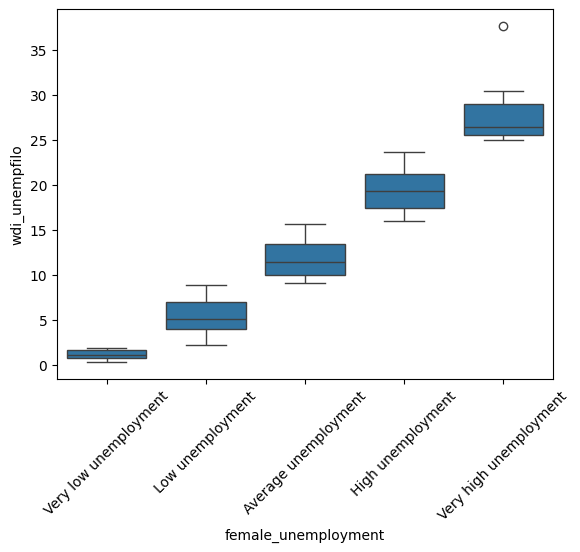

In [ ]:
# Visualizing data by plotting a plot box
sns.boxplot(x='female_unemployment', y='wdi_unempfilo', data=df, order=["Very low unemployment", "Low unemployment", "Average unemployment", "High unemployment", "Very high unemployment"])
# Change the slope of the x-ax label
plt.xticks(rotation=45)

Referring to the box plot and the table below, it is possible to assess that the highest degree of variability in the data is in the "Very high unemployment" section, with a standard deviation of 3.8. This result indicates that the countries in this category are quite different in terms of female unemployment levels. In contrast, the data in the "Very low unemployment" section show the lowest variation, with a standard deviation of only 0.5, meaning the level of female unemployment among these countries is very similar.

In [ ]:
print(df.groupby('female_unemployment')['wdi_unempfilo'].describe())

                        count       mean       std        min      25%  \
female_unemployment                                                      
Very low unemployment    11.0   1.125091  0.536134   0.323000   0.7210   
Low unemployment        100.0   5.310510  1.775331   2.177000   3.9495   
Average unemployment     31.0  11.753387  2.068734   9.077000   9.9350   
High unemployment        26.0  19.364346  2.376790  16.011999  17.4195   
Very high unemployment   10.0  27.961200  3.844117  24.990000  25.5345   

                            50%       75%        max  
female_unemployment                                   
Very low unemployment    1.0890   1.61300   1.908000  
Low unemployment         5.1160   6.97425   8.848000  
Average unemployment    11.3890  13.37400  15.693000  
High unemployment       19.3070  21.19550  23.641001  
Very high unemployment  26.4655  28.94225  37.619999  


<ipython-input-88-3251b870e541>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('female_unemployment')['wdi_unempfilo'].describe())


**2-- Use one (or both) of your recoded variables to do a cross-tabulation. Explain your results.**
I will use my two recoded variables in the cross-tabulation. I expect these two variables to be related to some degree. Specifically, I anticipate that as the democracy status of a country increases, female unemployment decreases. Therefore, I foresee an inverse relationship between the two variables.
**Overall**, my null hypothesis is that there is no relationship between democracy status and female unemployment, while my alternative hypothesis is that there is an inverse relationship between the two variables.

In [ ]:
# cross-tabulate two variables with normalization
pd.crosstab(df_cleaned.democracy_status, df_cleaned.female_unemployment, normalize='columns')*100

female_unemployment,Very low unemployment,Low unemployment,Average unemployment,High unemployment,Very high unemployment
democracy_status,,,,,
Fair status,11.111111,34.246575,20.833333,21.052632,30.0
Good status,22.222222,26.027397,37.500000,36.842105,10.0
Poor status,66.666667,26.027397,29.166667,26.315789,40.0
Very good status,0.000000,13.698630,12.500000,10.526316,0.0
Very poor status,0.000000,0.000000,0.000000,5.263158,20.0


From the cross tabulation with normalization, it is possible to observe that in countries with a very poor democracy status, female unemployment is either very high or high, which is consistent with the alternative hypothesis. However, there are some surprising findings: countries with poor democracy status have a significant portion of very low unemployment, and countries with good democracy status show a relatively high portion of high unemployment.
Overall, **I do not observe a strong association between the two variables**, and I would suggest that other factors, such as the level of education and social norms, are likely influencing female unemployment.

In [ ]:
#cross tabulation without normalization
cross_tab = pd.crosstab(df_cleaned['democracy_status'], df_cleaned['female_unemployment'])
cross_tab

female_unemployment,Very low unemployment,Low unemployment,Average unemployment,High unemployment,Very high unemployment
democracy_status,,,,,
Fair status,1,25,5,4,3
Good status,2,19,9,7,1
Poor status,6,19,7,5,4
Very good status,0,10,3,2,0
Very poor status,0,0,0,1,2


From the tables above and below, we can observe in a different format the same conclusion reached earlier: it is difficult to see a clear association between the two variables.

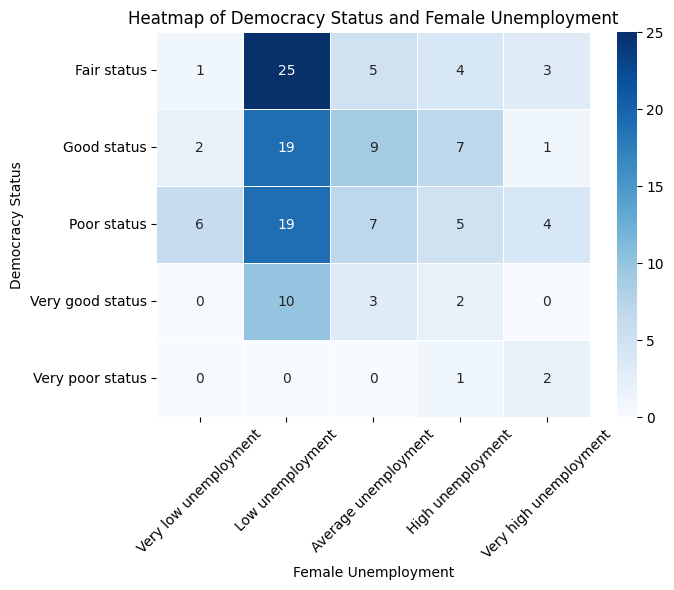

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="Blues", linewidths=0.5)
plt.title('Heatmap of Democracy Status and Female Unemployment')
plt.xlabel('Female Unemployment')
plt.ylabel('Democracy Status')
# Change the slope of the x-ax label
plt.xticks(rotation=45)
plt.show()

The correlation is negative as expected, but very weak, as pointed out above.

In [ ]:
# The Pearson correlation
df['bti_ds'].corr(df['wdi_unempfilo'])

-0.12203815222418973

From the graph below, we can once again reach the same conclusion as above, just visualized differently. The association between democracy status and female unemployment does not seem strong. One additional observation is that "low unemployment" appears to be the predominant category across all levels of democracy status, except for the "very poor" status.
Overall, while these graphical representations may not be strictly necessary, they can sometimes be useful to present the same variables in multiple ways.

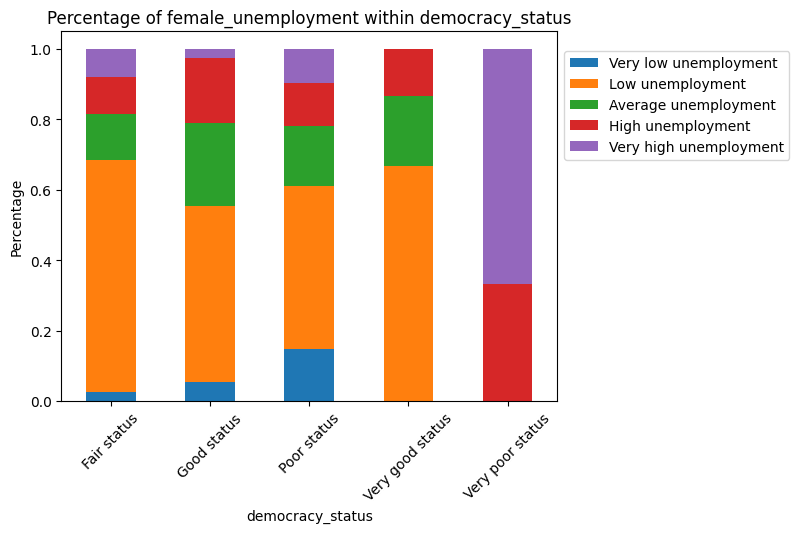

In [ ]:
def plot_grouped_percentage(df, group_vars):
    group_counts = df.groupby(group_vars, observed=True).size().unstack()
    group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0)
    group_percentages.plot(kind='bar', stacked=True)
    plt.ylabel('Percentage')
    plt.title(f'Percentage of {group_vars[1]} within {group_vars[0]}')
    # Move the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    plt.xticks(rotation=45)
plot_grouped_percentage(df, ['democracy_status', 'female_unemployment'])

**3-- Run a correlation of one variable with another variable; make all of the recodes necessary to make the correlation as easy to interpret as possible; and explain your results.**

I will investigate the correlation between wdi_unempfilo (female unemployment) and bti_cr (the extent to which civil rights are guaranteed and protected in a country, on a scale of 1 to 10). I would expect these two variables to be negatively correlated, meaning that in countries where civil rights are more respected and protected, there would be higher participation of women in the labor force, leading to a decrease in female unemployment.
Overall, my null hypothesis would be that there is no association between the two variables. While my alternative hypothesis would be that there is a inverse association.

In [ ]:
# Calculating the Pearson correlation
df['bti_cr'].corr(df['wdi_unempfilo'])

-0.07880109917142966

As expected, the relationship between the variables is negative; but very weak, making it difficult to assert that there is an association between the two.

The top five countries based on how guaranteed and procted are civil rights are: Estonia, Uruguay, Taiwan, Czechia, and Costa Rica. In particular, the first 3 countries are in the following circumanstance: civil rights are guaranteed by the constitution and respected by all state institutions. Infringements present an extreme exception. Citizens are effectively protected by mechanisms and institutions established to prosecute, punish and redress violations of their rights. The bottom five countries are Yemen, the Democratic People's Republic of Korea, the Syrian Arab Republic, Eritrea, and Turkmenistan. This countries are all considered to have the following feature: civil rights are not guaranteed, and are frequently violated. There are no mechanisms and institutions to protect citizens against violations of their rights.

In [ ]:
# Fnding the 5 highest values of this variable, along with the name of the corresponding countries
df[['cname', 'bti_cr']].dropna().sort_values(by='bti_cr', ascending=False).head(5)

,cname,bti_cr
56,Estonia,10.0
188,Uruguay,10.0
37,Taiwan (Province of China),10.0
46,Czechia,9.0
42,Costa Rica,9.0


In [ ]:
# Finding the 5 lowest values on this variable, along with the name of the corresponding countries
df[['cname', 'bti_cr']].dropna().sort_values(by='bti_cr', ascending=True).head(5)

,cname,bti_cr
192,Yemen,1.0
89,Korea (the Democratic People's Republic of),1.0
169,Syrian Arab Republic (the),1.0
55,Eritrea,1.0
178,Turkmenistan,1.0


**Conclusions**

Recoded variables reveal patterns: Breaking democracy status and female unemployment into categories highlights trends and anomalies.

Weak correlations: While there are weak negative relationships between democracy, civil rights, and female unemployment, the effect sizes are small.

Structural inequalities matter: Additional factors, such as education, labor laws, and cultural norms, likely mediate the observed relationships.